## SHASHANK RAWAT

## Task 5: Perform ‘Exploratory Data Analysis’ on the dataset Sample Superstore

### Objective:
**You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?** 

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

import seaborn as sns

In [2]:
# Importing Dataset
df=pd.read_csv('C:/Users/Shashank rawat/Downloads/SampleSuperstore.csv')


In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**There is no missing values in Dataset.**

In [8]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Postal code is a categorical variable**

In [9]:
# changing datatype os postal code from int64 to object.
df['Postal Code']=df['Postal Code'].astype('str')

In [10]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [11]:
# Checking the duplicate rows in the dataset
df.duplicated().sum()

17

**There are 17 duplicate rows in the Dataset.**

In [12]:
# Removing Duplicates
df.drop_duplicates(inplace=True,keep='first')

In [13]:
df.shape

(9977, 13)

### Counting Distinct Values in Columns

In [14]:
df.nunique(axis = 0, dropna = True)

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [15]:
df.Country.unique()

array(['United States'], dtype=object)

**There is only one Value in Country Column "United States" so it is not very important for our Analysis, It is better to drop it**

In [16]:
#removing the Country columns
df.drop(['Country'], axis=1, inplace=True)

### Descriptive Statistics:

In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ship Mode,9977,4,Standard Class,5955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9977,3,Consumer,5183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9977,531,New York City,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9977,49,California,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9977,631,10035,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,9977,4,West,3193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9977,3,Office Supplies,6012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,9977,17,Binders,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9977,NaN,NaN,NaN,230.149,623.721,0.444,17.3,54.816,209.97,22638.5
Quantity,9977,NaN,NaN,NaN,3.79072,2.22666,1,2,3,5,14


## Correlation between columns:

In [18]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


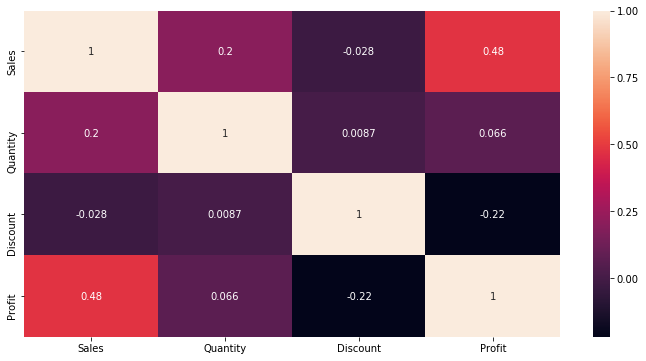

In [19]:
# Heat map showing correlation between columns:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(),annot=True)

**From the above Correlation heat map, We can observe there is weak correlation between variables.**

## DATA VISUALIZATION:

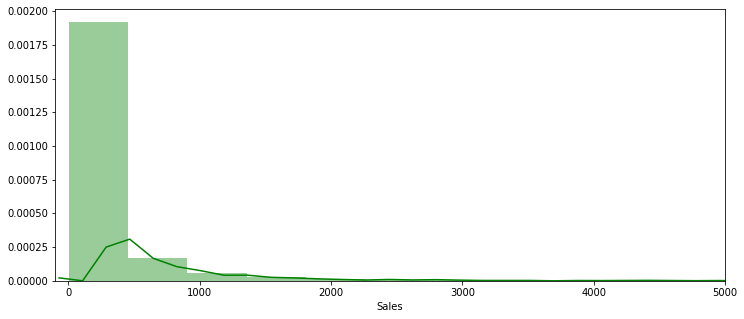

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(df['Sales'],color='g')
plt.xlim(-100,5000)
plt.show()

**Maximum sales is under 1000**

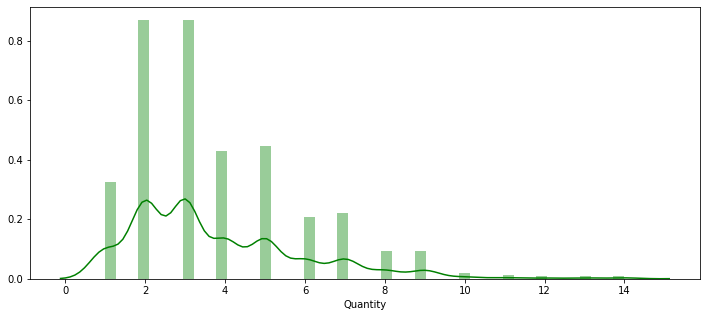

In [21]:
plt.figure(figsize=(12,5))
sns.distplot(df['Quantity'], color= 'green')
plt.show()

**Most of the time quantity purchased by the customer in each transiction is between 2 and 4.**

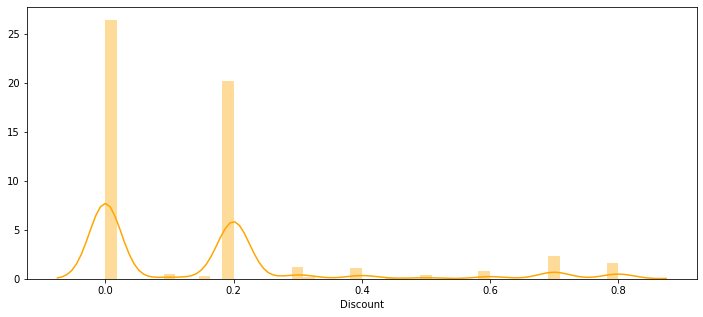

In [22]:
plt.figure(figsize=(12,5))
sns.distplot(df['Discount'], color= 'orange')
plt.show()

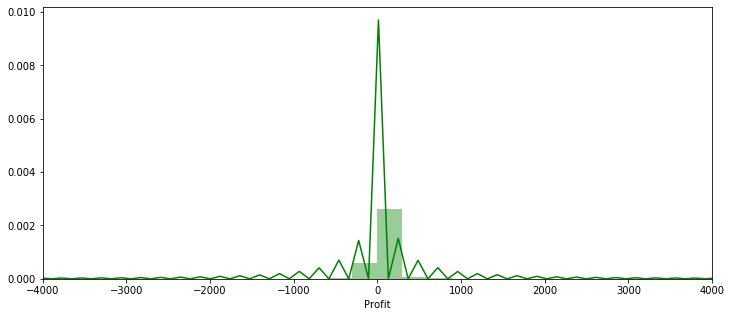

In [23]:
plt.figure(figsize=(12,5))
sns.distplot(df['Profit'], color= 'green')
plt.xlim(-4000,4000)
plt.show()

In [24]:
df.Sales.describe()

count     9977.000000
mean       230.148902
std        623.721409
min          0.444000
25%         17.300000
50%         54.816000
75%        209.970000
max      22638.480000
Name: Sales, dtype: float64

## Category Analysis:

Text(0, 0.5, 'Sales')

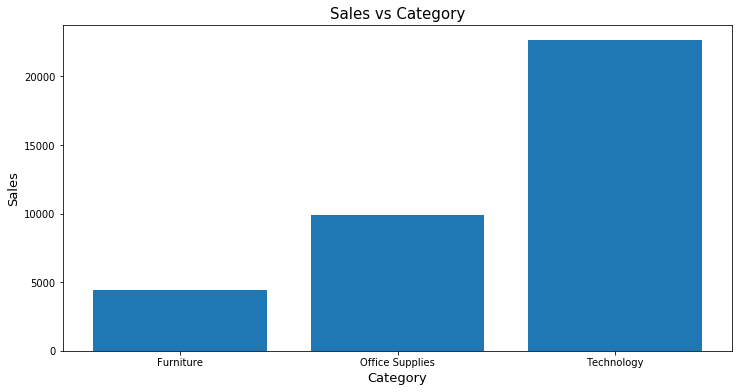

In [25]:
plt.figure(figsize=(12,6))
plt.bar('Category','Sales',data=df)
plt.title('Sales vs Category',size= 15)
plt.xlabel('Category',size= 13)
plt.ylabel('Sales',size= 13)

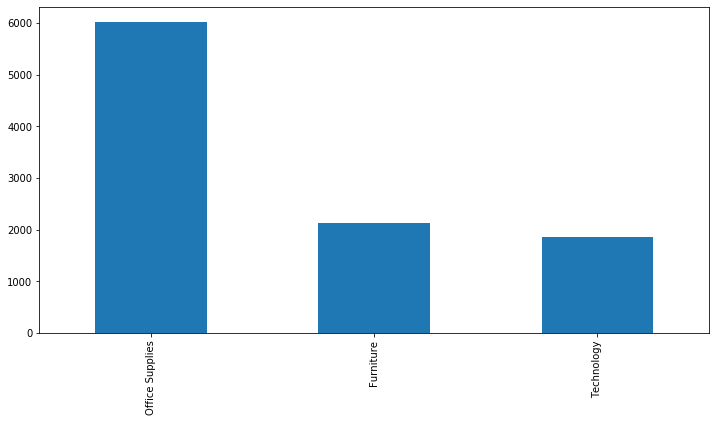

In [26]:
plt.figure(figsize=(12,6))
df.Category.value_counts().plot(kind='Bar')

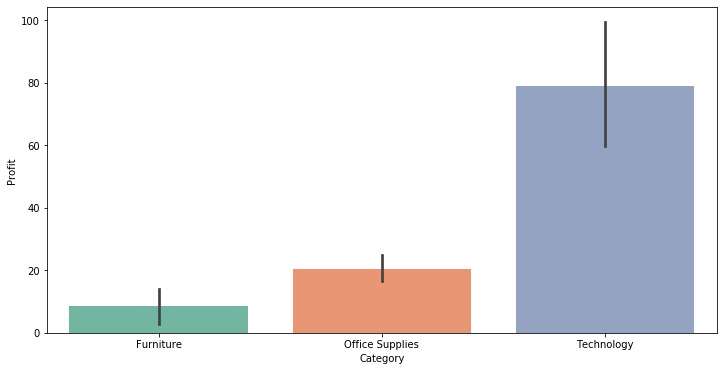

In [27]:
plt.figure(figsize=[12,6])
ax = sns.barplot(x="Category", y="Profit", data=df, palette="Set2")

### Obsevation:

### Technology is the Highest Selling Category and Furniture is the Least selling Category in terms of Sales Amount.

**Highest quantity of item sold is of category Office supplies followed by Furnitures and Technology.**    
Despite the low quanity sold, Technology Sales Amount is highest.Therefore, We can conclude that Technology category is the costliest Category.

Technology is also the highest profit Generating Category and Furniture the Least.

## Sub- Category Analysis: 

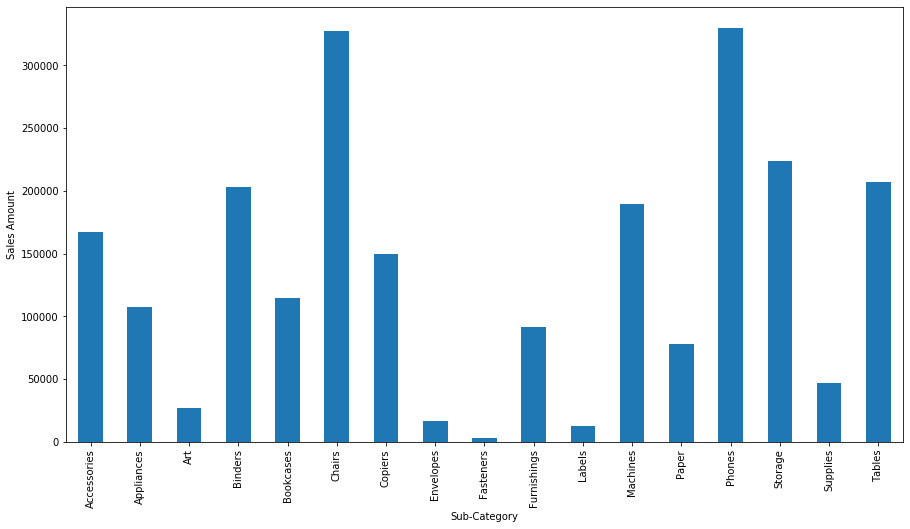

In [28]:
plt.figure(figsize=(15,8))
df.groupby('Sub-Category').Sales.sum().plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()


### Sub Caegory vs. Number of purchase.

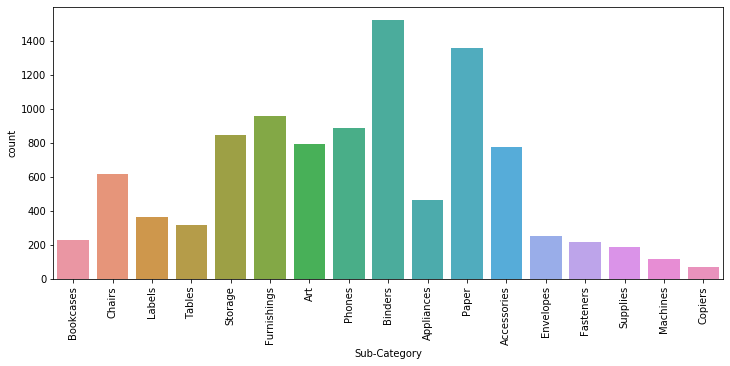

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(df['Sub-Category'])
plt.xticks(rotation = 90)
plt.show()

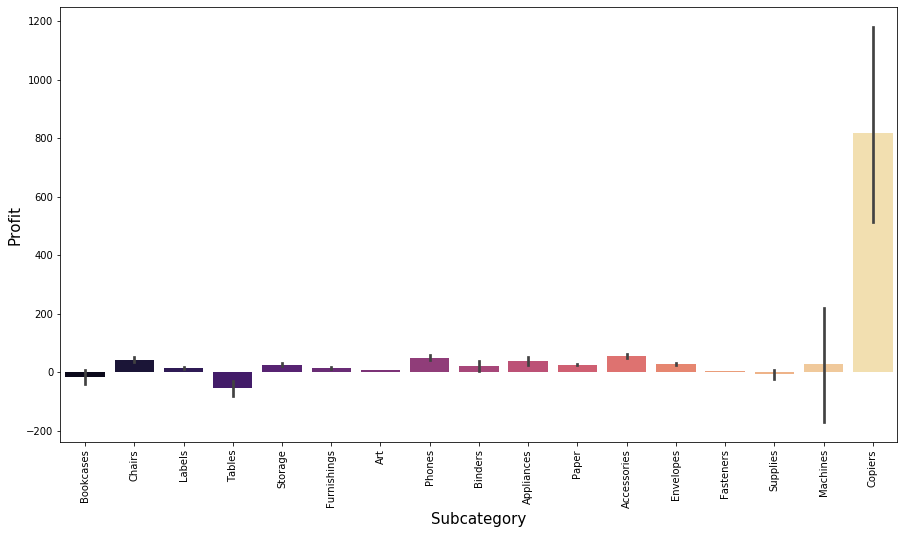

In [30]:
plt.figure(figsize=[15,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=df, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observation:

Highest Sub category in terms of Sales Amount are Chairs and Phones and lowest are Fasterners and Labels.  
Highest Sub Category in terms of Quantity sold are Binders and Paper And lowest are Copier and Machine(as these items are the costliest).
Copier is Genearting most profit. and Bookcase and Tables are incurring Loses.

## Segment Analysis:

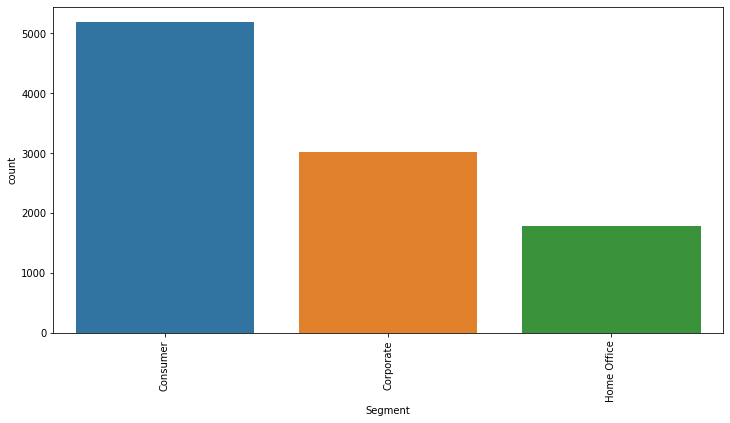

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(df['Segment'])
plt.xticks(rotation = 90)
plt.show()

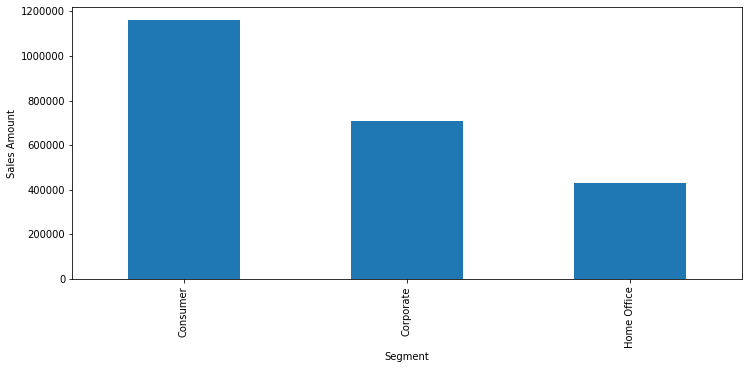

In [32]:
plt.figure(figsize=(12,5))
df.groupby('Segment').Sales.sum().plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

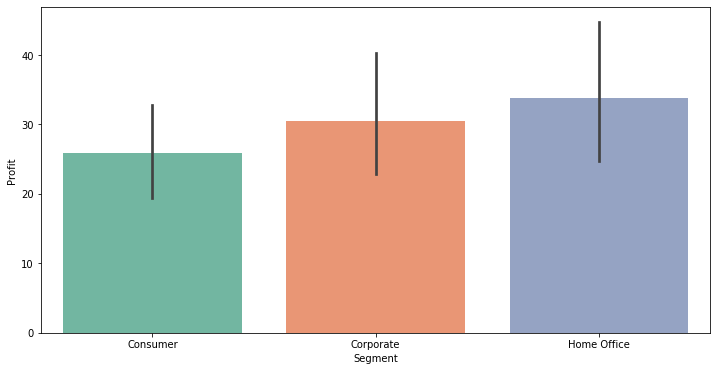

In [33]:
plt.figure(figsize=[12,6])
ax = sns.barplot(x="Segment", y="Profit", data=df, palette="Set2")

### Observation:

**Segment Consumer is leading both in terms of number of Sales and Sales Amount.    
Whereas Home office is the most profitable Segment.**

## Shipping Modes:

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

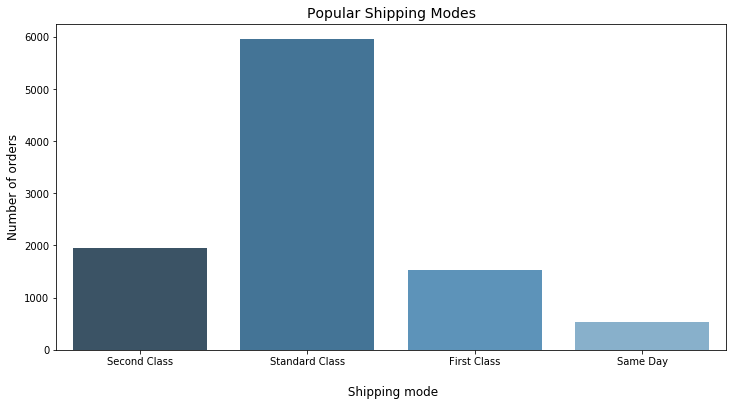

In [34]:
plt.figure(figsize=(12,6))
sns.countplot('Ship Mode',data=df, palette='Blues_d')
plt.title('Popular Shipping Modes',size=14)
plt.xlabel('\n Shipping mode',size=12)
plt.ylabel('Number of orders',size=12)
plt.xticks(fontsize=10)

### Observation:

The Standard Class Shipping mode has most count which means Cost of standard shipping delivery is least as compared to other
modes.    
Therefore, customers have opted it most when they buy something.   
Same Day delivery mode is least opted by the customers.  

## Region Wise analysis:

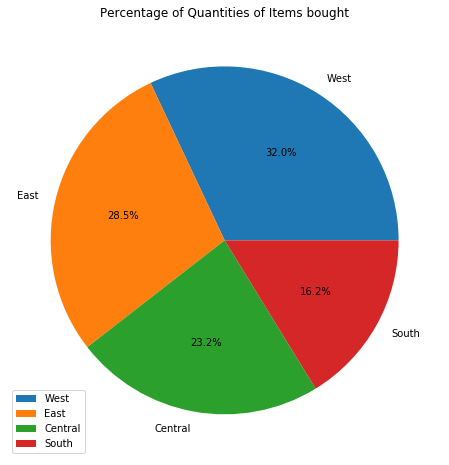

In [35]:
plt.figure(figsize=(10,8))
plt.pie(df['Region'].value_counts(),labels=list(df['Region'].value_counts().index),autopct='%1.1f%%')
plt.title('Percentage of Quantities of Items bought')
plt.legend()
plt.show()

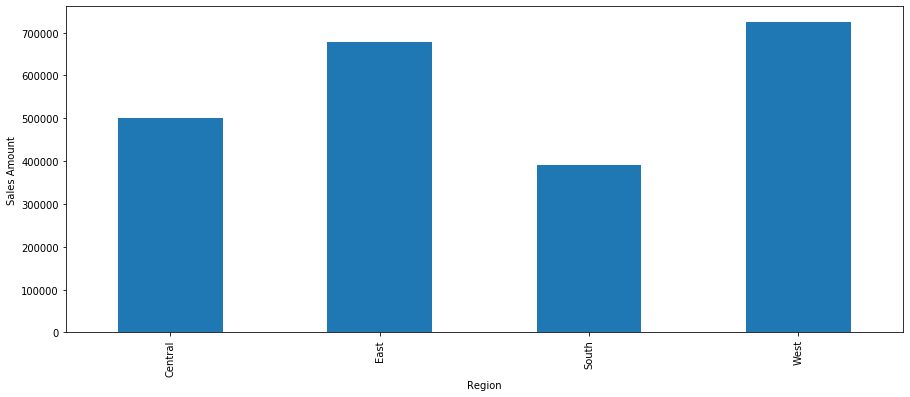

In [36]:
plt.figure(figsize=(15,6))
d=df.groupby('Region').Sales.sum().plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

### Observation:
   **West region is leading in Sales followed by East,Central and South.**

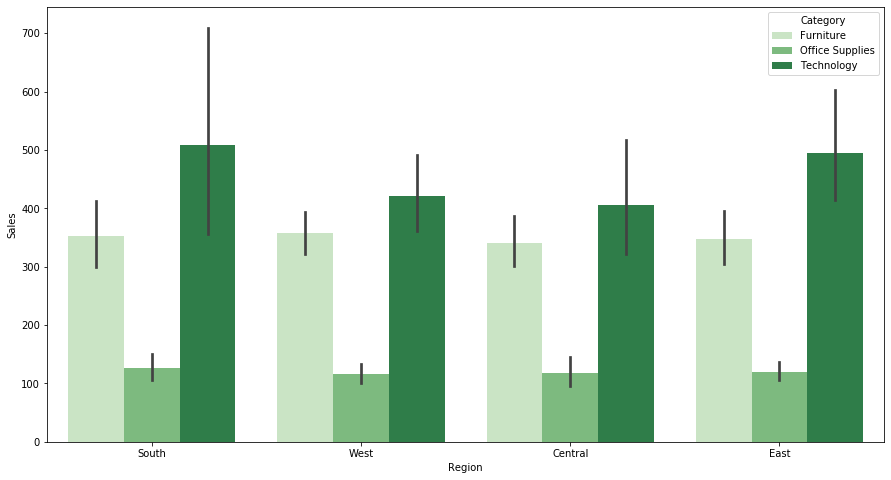

In [37]:
#Category wise sales in Each region
plt.figure(figsize=[15,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=df, palette="Greens")

### Observation:

### In each Region Office supply is worst performing Category and Technology is best performing Category

## State wise Anlysis of Sales and  Profit.:

In [38]:
group_s=df.groupby('State')

In [39]:
sales_agg=group_s['Sales'].sum().sort_values(ascending=False)
sales_agg.head()

State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Name: Sales, dtype: float64

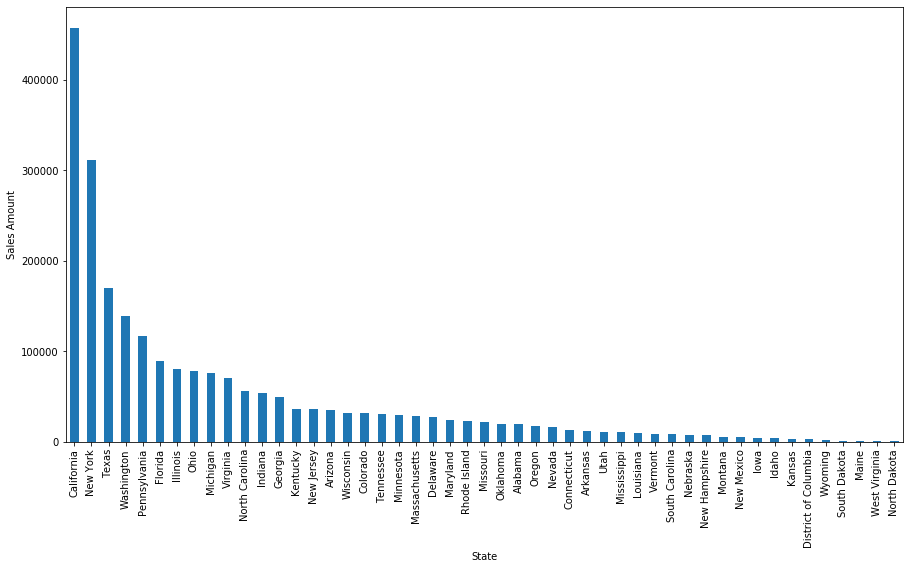

In [40]:
plt.figure(figsize=(15,8))
sales_agg.plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

## Observation:
California is the leading in Sales Amount followed by New york, Texas, Washington and Pennsylvania.

In [41]:
Profit_agg=group_s['Profit'].sum().sort_values(ascending=False)
Profit_agg.head()

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Name: Profit, dtype: float64

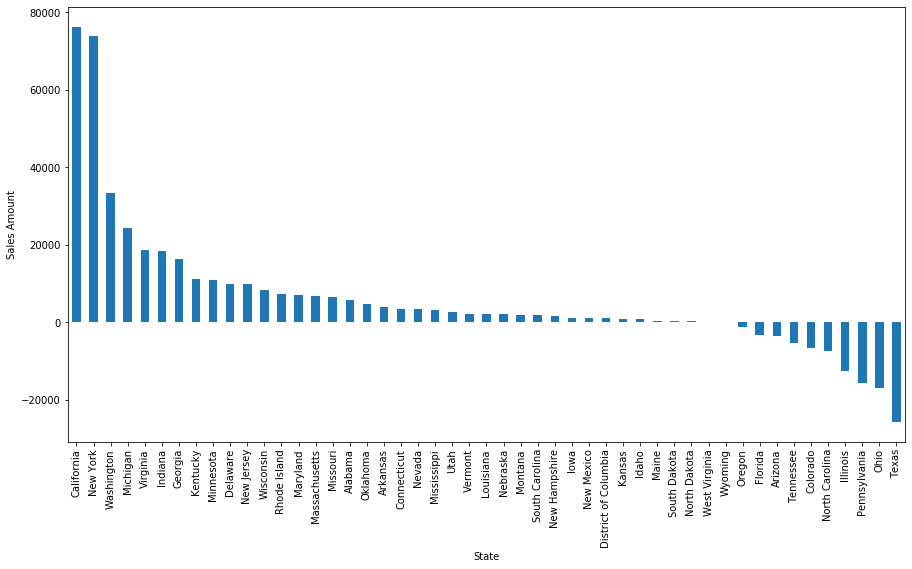

In [42]:
plt.figure(figsize=(15,8))
Profit_agg.plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

### Observation:
California is the leading in Profits followed by New york,Washington,Mivhigan and Virginia.

In [43]:
Discount_agg=group_s['Discount'].sum().sort_values(ascending=False)
Discount_agg.head()

State
Texas           364.24
Pennsylvania    192.70
Illinois        191.10
Ohio            152.10
California      145.60
Name: Discount, dtype: float64

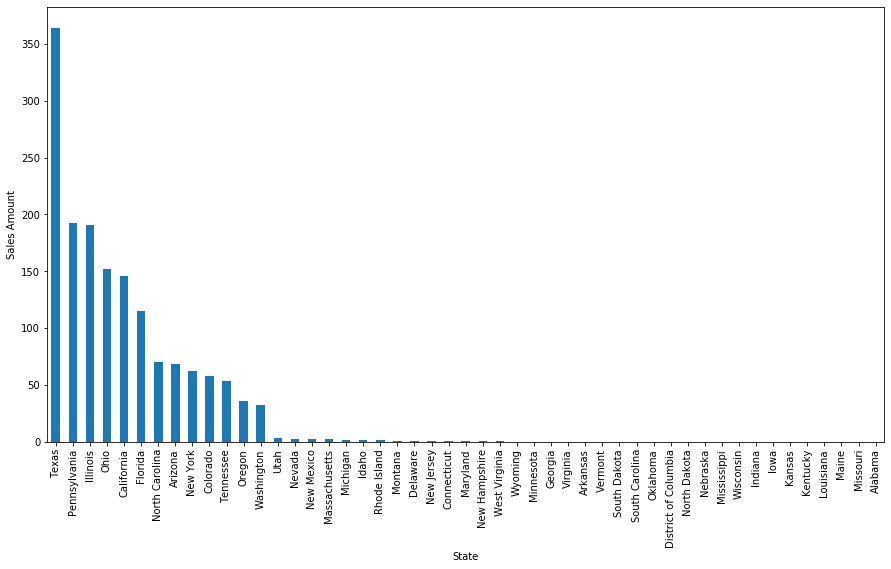

In [44]:
plt.figure(figsize=(15,8))
Discount_agg.plot(kind='bar')
plt.ylabel('Sales Amount')
plt.show()

### Observation:
Texas gives most discounts followed by Pennsylvania, Illinois, Ohio and California

In [45]:
avg_sales=group_s['Sales'].mean().sort_values(ascending=False)
avg_sales.head()

State
Wyoming         1603.136000
Vermont          811.760909
Nevada           428.951333
Rhode Island     404.070643
Montana          372.623467
Name: Sales, dtype: float64

In [46]:
avg_profit=group_s['Profit'].mean().sort_values(ascending=False)
avg_profit.head()

State
Vermont         204.088936
Rhode Island    130.100523
Indiana         123.375411
Montana         122.221900
Minnesota       121.608847
Name: Profit, dtype: float64

In [47]:
avg_discount=group_s['Discount'].mean().sort_values(ascending=False)
avg_discount.head()

State
Illinois        0.389206
Texas           0.370539
Pennsylvania    0.328840
Ohio            0.325000
Colorado        0.316484
Name: Discount, dtype: float64

## Obervaton:
**Intrestingly States with Highest average sales,Profit and Discount is different from the States with Highest aggregated Sales, Profit and Discount.**

## City wise Anlysis of Sales and  Profit:

In [48]:
df1_sum = df.groupby(['City'])[['Sales', 'Discount','Profit']].sum()
df1_sum['No of Purchase'] = df['City'].value_counts().to_frame()
df1_sum.head()

,Sales,Discount,Profit,No of Purchase
City,,,,
Aberdeen,25.500,0.0,6.6300,1
Abilene,1.392,0.8,-3.7584,1
Akron,2729.986,7.5,-186.6356,21
Albuquerque,2220.160,0.8,634.0881,14
Alexandria,5519.570,0.0,318.6183,16


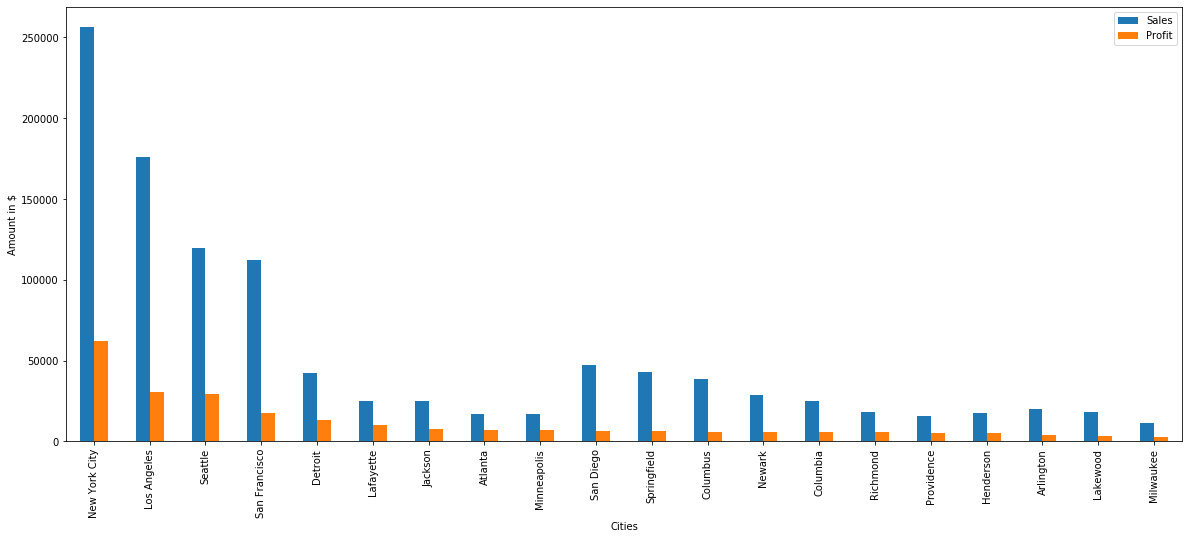

In [49]:
# Sorted on basis of Profit.
df1_sum.sort_values('Profit',ascending=False).head(20)[['Sales','Profit']].plot(kind='bar',figsize= (20,8),label=['Avg Sales Price($)','Profit($)'])
plt.ylabel('Amount in $')
plt.xlabel('Cities')
plt.legend()
plt.show()

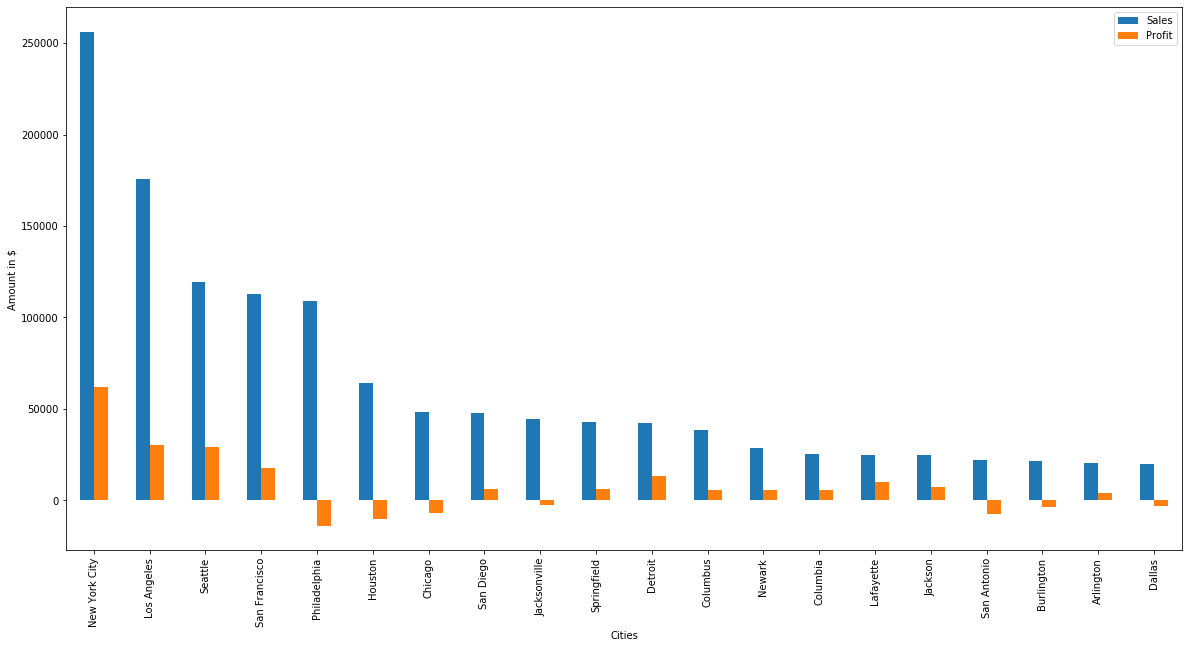

In [50]:
# Sorted on basis of Sales.
df1_sum.sort_values('Sales',ascending=False).head(20)[['Sales','Profit']].plot(kind='bar',figsize= (20,10),label=['Avg Sales Price($)','Profit($)'])
plt.ylabel('Amount in $')
plt.xlabel('Cities')
plt.legend()
plt.show()

### Observation:
New york City leads in both parameter sales and profit. followed by Los angles, Seattle, San Francisco and Philadelphia in sales. and Los angles, Seattle, San Francisco and Detroit in terms of Profit.   
we can also observe that despite higher sales in philadelphia the profit is in Negative(Loss).

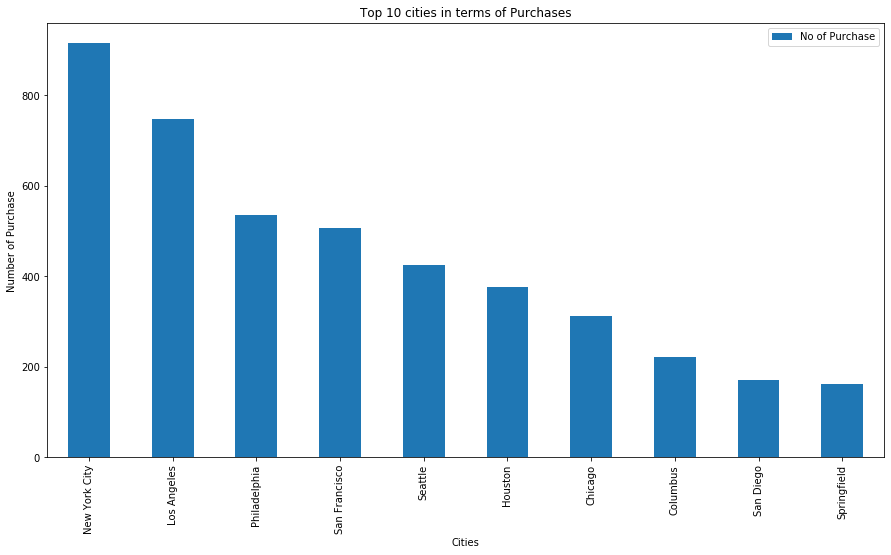

In [51]:
df1_sum.sort_values('No of Purchase',ascending=False).head(10)[['No of Purchase']].plot(kind='bar',figsize=(15,8))
plt.title('Top 10 cities in terms of Purchases')
plt.ylabel('Number of Purchase')
plt.xlabel('Cities')
plt.legend()
plt.show()

### Observation:
The Highest purchase was done in New York city followed by Los Angeles, Philadelphia and San Francisco.

In [52]:
df1_mean = df.groupby(['City'])[['Sales', 'Discount','Profit']].mean()
df1_mean.head()

,Sales,Discount,Profit
City,,,
Aberdeen,25.500000,0.000000,6.630000
Abilene,1.392000,0.800000,-3.758400
Akron,129.999333,0.357143,-8.887410
Albuquerque,158.582857,0.057143,45.292007
Alexandria,344.973125,0.000000,19.913644


In [53]:
df1_mean['No of Purchase'] = df['City'].value_counts().to_frame()
df1_mean.head()

,Sales,Discount,Profit,No of Purchase
City,,,,
Aberdeen,25.500000,0.000000,6.630000,1
Abilene,1.392000,0.800000,-3.758400,1
Akron,129.999333,0.357143,-8.887410,21
Albuquerque,158.582857,0.057143,45.292007,14
Alexandria,344.973125,0.000000,19.913644,16


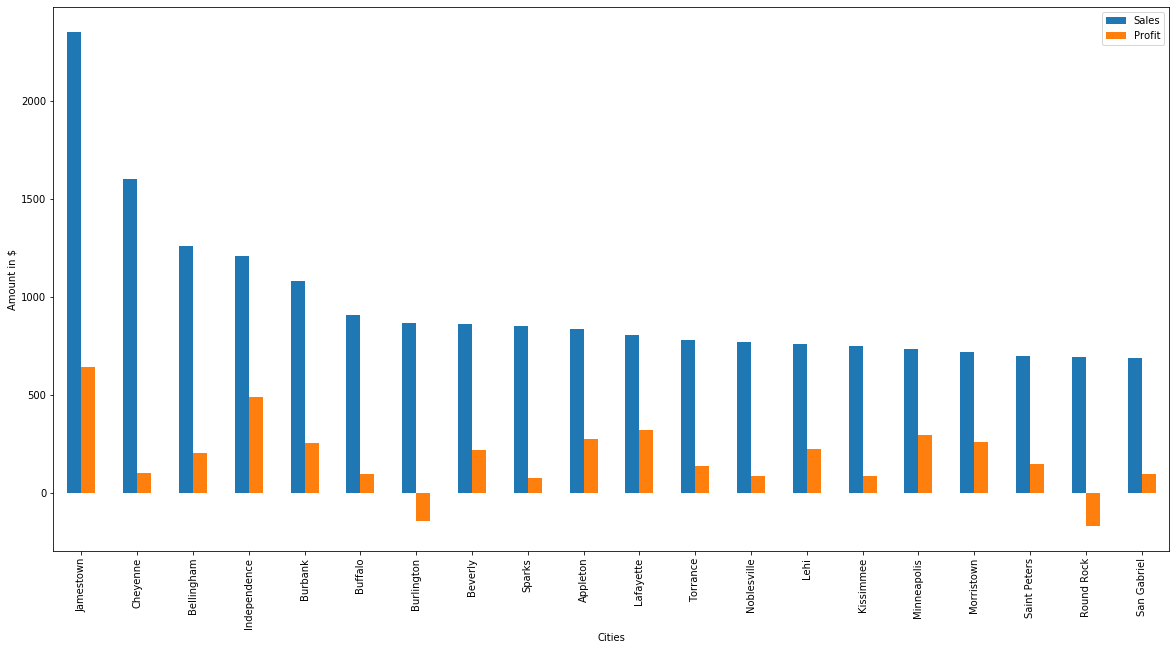

In [54]:
# Sorted on basis of Sales.(Top 20)
df1_mean.sort_values('Sales',ascending=False).head(20)[['Sales','Profit']].plot(kind='bar',figsize= (20,10),label=['Avg Sales Price($)','Profit($)'])
plt.ylabel('Amount in $')
plt.xlabel('Cities')
plt.legend()
plt.show()

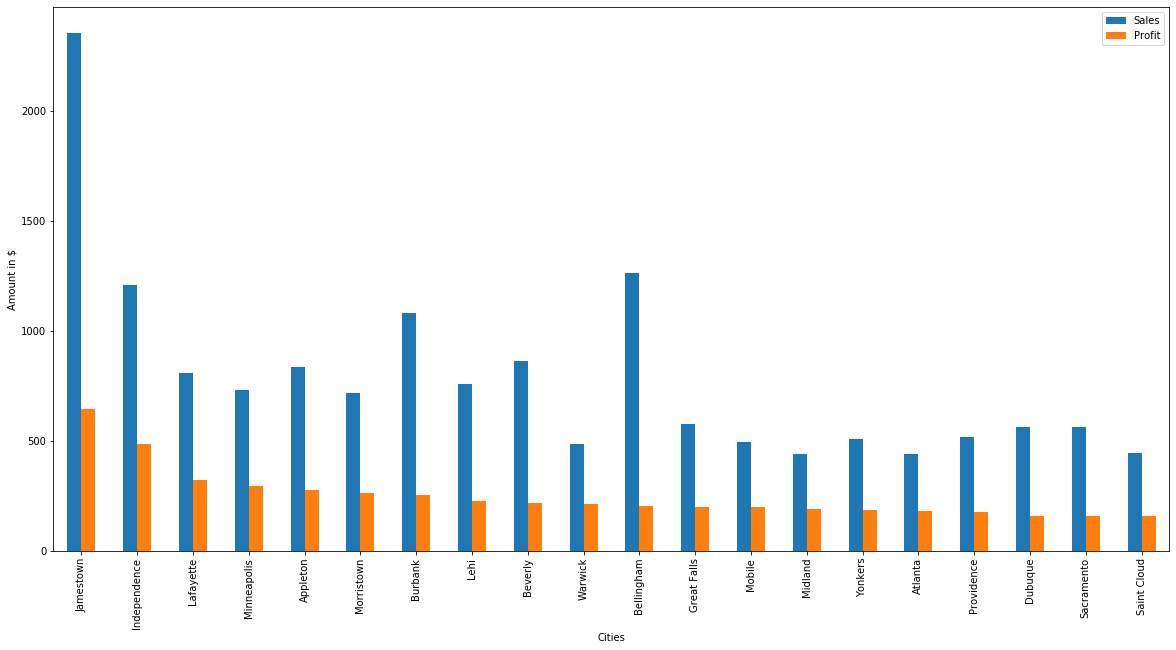

In [55]:
# Sorted on basis of Profit.For top 20 Cities
df1_mean.sort_values('Profit',ascending=False).head(20)[['Sales','Profit']].plot(kind='bar',figsize= (20,10),label=['Avg Sales Price($)','Profit($)'])
plt.ylabel('Amount in $')
plt.xlabel('Cities')
plt.legend()
plt.show()

### Observation:
Top 5 Cities in terms of Average Sales are Jamestown, Cheyenne, Bellingham, Independence, Burbank.   
and for Top 5 cities in Average Profit are Jamestown, Independence, Lafayette, Minneapollis, Appleton.

### City-wise Discount:

In [56]:
df1_mean.sort_values('Discount',ascending=False).head(10)

,Sales,Discount,Profit,No of Purchase
City,,,,
Abilene,1.3920,0.800000,-3.75840,1
Deer Park,6.9240,0.800000,-10.38600,1
Romeoville,8.9520,0.800000,-14.77080,1
Missouri City,6.3700,0.800000,-9.55500,1
Elyria,1.8240,0.700000,-1.39840,1
Pensacola,2.2140,0.700000,-1.47600,1
Ormond Beach,2.8080,0.700000,-1.96560,1
Littleton,72.2940,0.700000,-98.80180,1
Tyler,69.4412,0.640000,-88.74172,5


In [57]:
df1_sum.sort_values('Discount',ascending=True).head(10)

,Sales,Discount,Profit,No of Purchase
City,,,,
Aberdeen,25.50,0.0,6.6300,1
Edmond,959.55,0.0,243.1039,2
Manhattan,273.96,0.0,10.9584,1
Manchester,2126.28,0.0,600.5054,11
Elkhart,171.43,0.0,16.6721,2
Malden,228.38,0.0,31.1692,3
Madison,5346.79,0.0,1123.6552,10
Macon,364.01,0.0,144.8535,6
Lowell,4837.93,0.0,1312.5717,16


### Observation:
Despite Giving the Highest Average Dicount city of Abilene,Deer park,Romeoville,Missouri City are incurring Lossess. 

# Conclussion:

### * Big cities like New York , Loss Angles and Seatle ae doing best in terms of Sales and Profit. 
### * Technology is best performing Category despite selling the least itmes.
### * Shipping mode is hughley influenced by cost as Standard Mode is opted by most customers.
### * In some Cities Despite Company giving huge discounts the Company is incurring Losses and there are some cities where no discount is Given, till Company is earning huge Profits. So, work is need to be done to improve the profits and Discount Policy needs Review.

